In [226]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", color_codes=True)

In [135]:
p = 100
b = 0.1
d = 10


def second(x):
    return x[1] + b*x[0]**2 - p*b


def U(x):
    return x[0]**2/2/p + second(x)**2 + (x[3:]**2).sum()/2


def grad_U(x):
    grad = x.copy()
    grad[0] = x[0]/p + 4*x[0]*b*second(x)
    grad[1] = 2*second(x)
    
    return grad


def task_dist(x):
    return np.exp(-U(x))

In [352]:
def MALA(x0, dist, h=0.1, n_samples=100):
    shape = x0.shape[0]
    samples = np.zeros((n_samples+1, shape))
    samples[0] = x0
    x = x0
                        
    l_cur = dist(x)
    u = np.random.rand(n_samples)
    grud_cur = grad_U(x)
    acceptances = np.zeros(n_samples)

    for i in range(n_samples):
        cand = np.random.multivariate_normal(samples[i] - h*grud_cur, 2*h*np.eye(shape))
        l_cand = dist(cand)
        acceptances[i] = min(l_cand / l_cur, 1)

        if acceptances[i] > u[i]:
            x = cand
            l_cur = l_cand
            grud_cur = grad_U(x)

        samples[i+1] = x
                        
    return samples, acceptances


def RWMA(x0, dist, sigma=1, n_samples=100, prop_dist='norm'):
    shape = x0.shape[0]
    samples = np.zeros((n_samples+1, shape))
    samples[0] = x0
    x = x0
                        
    l_cur = dist(x)
    u = np.random.rand(n_samples)
    if prop_dist == 'norm':
        z = np.random.normal(0, sigma, (n_samples, shape))
    elif prop_dist == 'laplace':
        z = np.random.laplace(0, sigma, (n_samples, shape))
    else:
        raise ValueError
    acceptances = np.zeros(n_samples)
    
    for i in range(n_samples):
        cand = x + z[i]
        l_cand = dist(cand)
        acceptances[i] = min(l_cand / l_cur, 1)

        if acceptances[i] > u[i]:
            x = cand
            l_cur = l_cand

        samples[i+1] = x
                        
    return samples, acceptances

In [335]:
x0 = np.random.rand(d)
steps = [10**i for i in range(-6, 3)]

h=1e-06, X2 mean: 0.49884821021202264


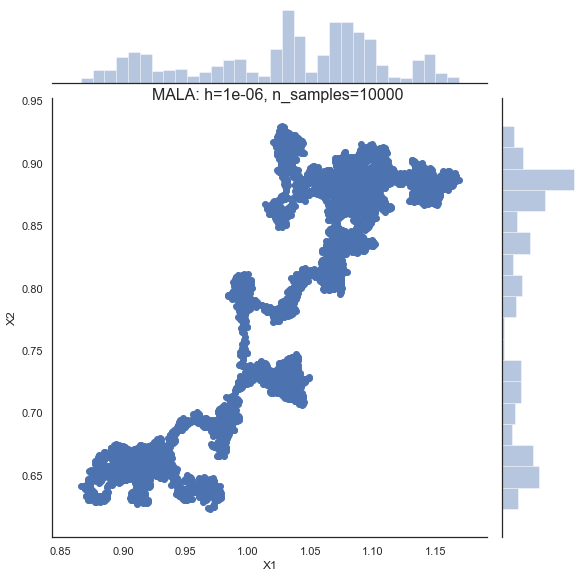

h=1e-05, X2 mean: 0.49849047069843033


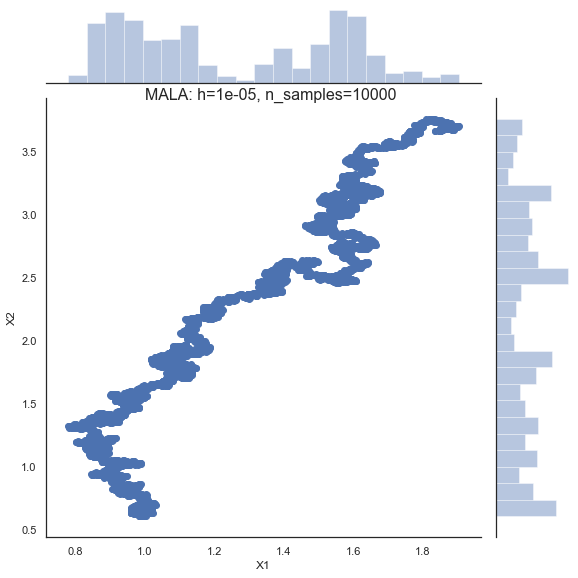

h=0.0001, X2 mean: 0.5023121960643604


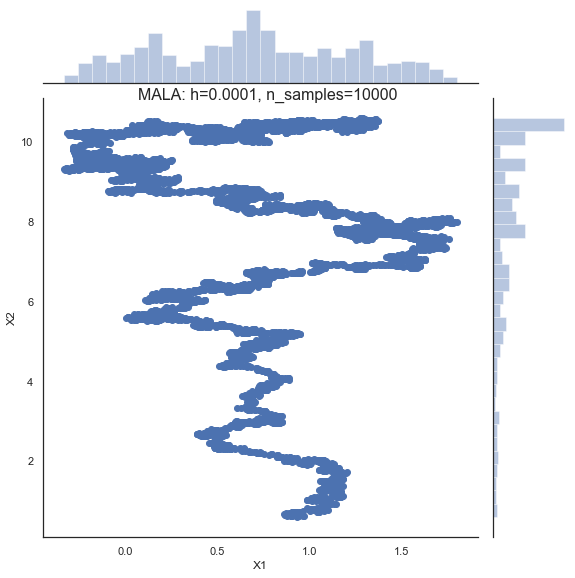

h=0.001, X2 mean: 0.4660510134251498


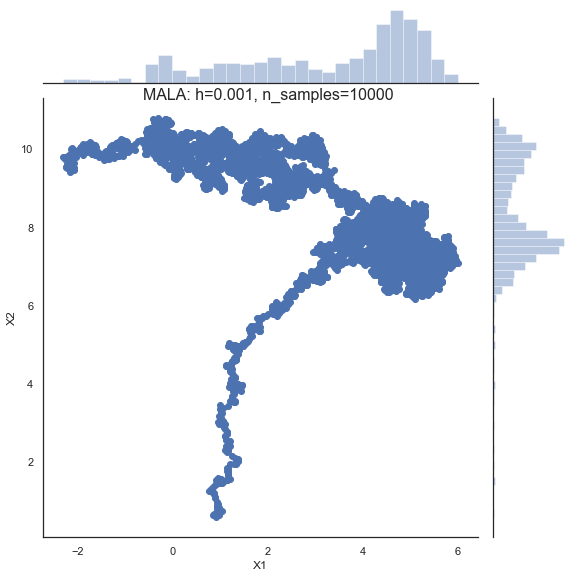

h=0.01, X2 mean: 0.5429855480356822


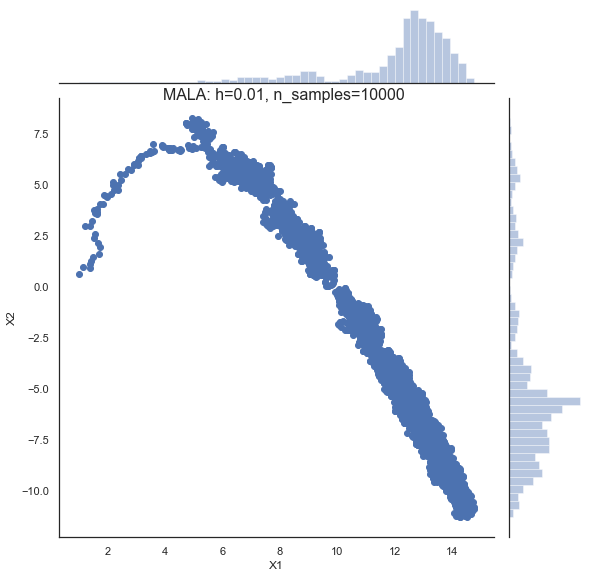

h=0.1, X2 mean: 0.46927247508218944


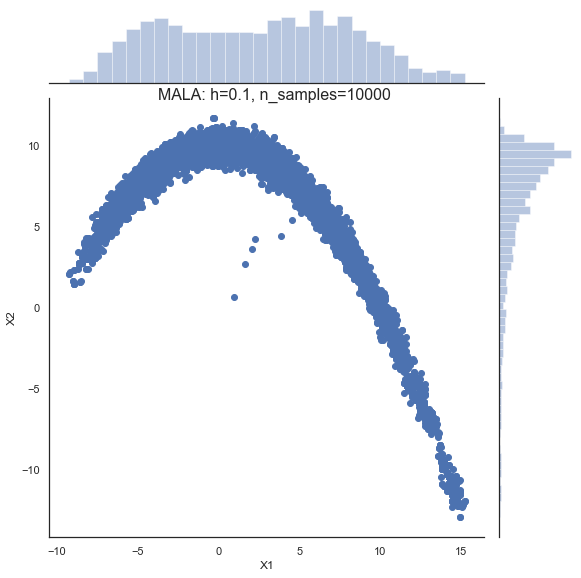

h=1, X2 mean: 0.49829677902913627


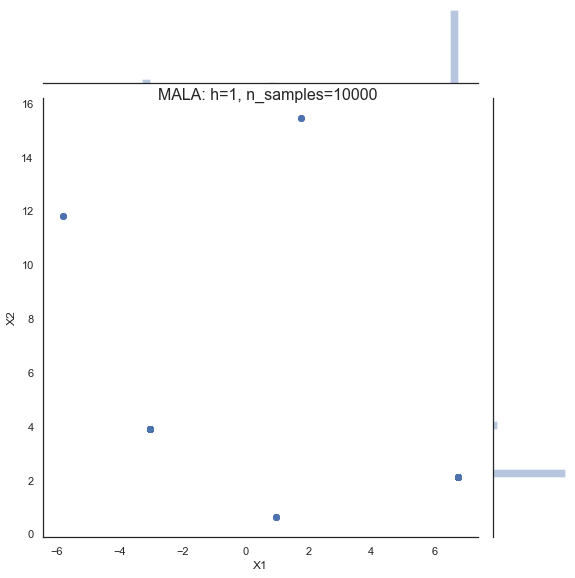

h=10, X2 mean: 0.49829677902913627


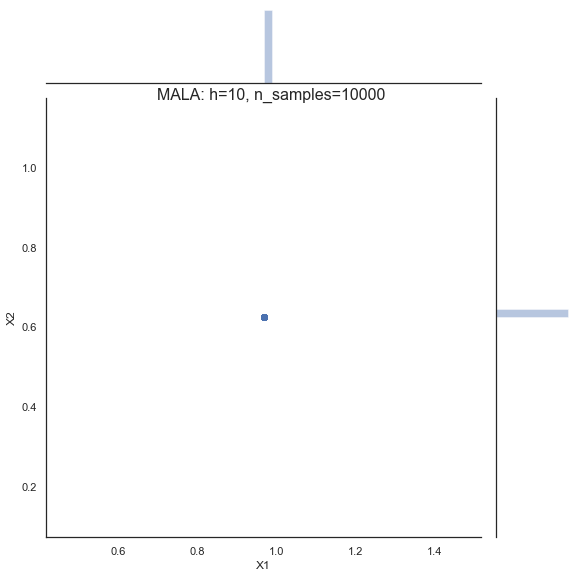

h=100, X2 mean: 0.49829677902913627


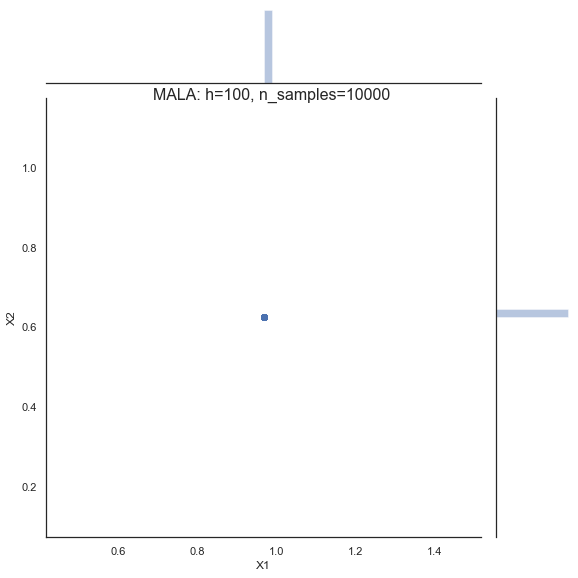

In [338]:
n_samples = 10000

results_MALA = {}
acceptances_MALA = {}

for h in steps:
    result_MALA, acceptance_MALA = MALA(x0, task_dist, h=h, n_samples=n_samples)
    results_MALA[h] = result_MALA
    acceptances_MALA[h] = acceptance_MALA
    
for h in steps:
    print(f'h={h}, X2 mean: {results_MALA[h][1].mean()}')
    g = sns.jointplot(x=results_MALA[h][:, 0], y=results_MALA[h][:, 1], height=8).set_axis_labels('X1', 'X2')
    plt.title(f'MALA: h={h}, n_samples={n_samples}', fontsize=16, x=-3, pad=-2)
    plt.show()

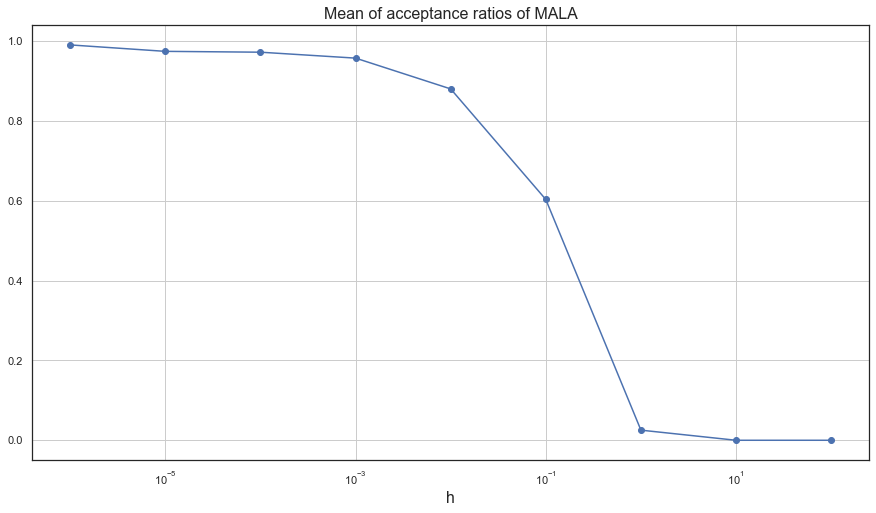

In [333]:
aa = [acceptances_MALA[h].mean() for h in steps]

plt.figure(figsize=(15, 8))
plt.plot(steps, aa, 'o-')
plt.xscale('log')
plt.xlabel('h', fontsize=16)
plt.title('Average ratio in MALA', fontsize=16)
plt.grid()

X2 mean: 0.9992882179796332


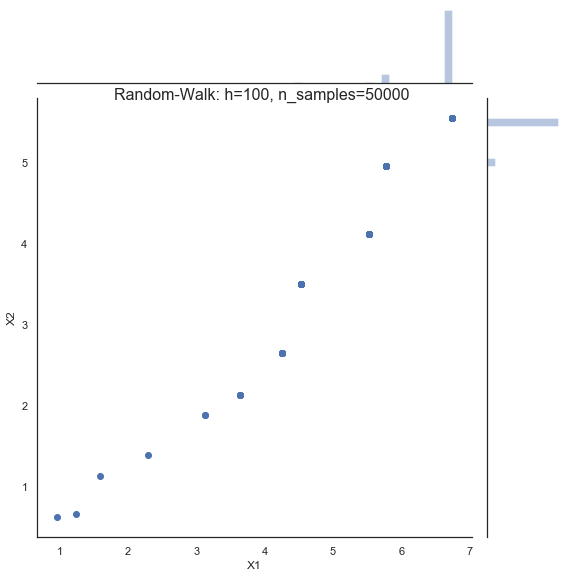

In [351]:
n_samples = 50000
props = ['norm', 'laplace', 'exp']

result_RWMA, acceptance_RWMA = RWMA(x0, task_dist, n_samples=n_samples, prop_dist='uni', sigma=1)
    
print(f'X2 mean: {result_RWMA[1].mean()}')
g = sns.jointplot(x=result_RWMA[:, 0], y=result_RWMA[:, 1], height=8).set_axis_labels('X1', 'X2')
plt.title(f'Random-Walk: h={h}, n_samples={n_samples}', fontsize=16, x=-3, pad=-2)
plt.show()

In [347]:
np.random.exponential(0.1, (5, 3))

array([[0.08534992, 0.16114848, 0.00168523],
       [0.04266706, 0.02071683, 0.04846689],
       [0.04392604, 0.09683118, 0.03862759],
       [0.06808033, 0.09741101, 0.05329024],
       [0.06351737, 0.10493517, 0.02545419]])